<a href="https://colab.research.google.com/github/debnathk/Customer_Segmentation_using_Unsupervised_Learning/blob/main/IETE_%7C_Day1_%7C_Project1_%7C_Customer_Segmentation_using_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = dataset.iloc[:, [3, 4]]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1, 11):
  model = KMeans(n_clusters=i, init='k-means++', random_state=0)
  model.fit(x)
  wcss.append(model.inertia_)

In [8]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

Text(0.5, 1.0, 'The Elbow Method')

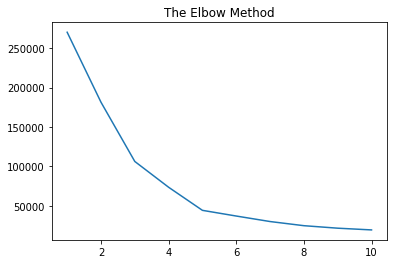

In [9]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")

In [10]:
model1 = KMeans(n_clusters=5, init='k-means++', random_state=0)
dependent = model1.fit_predict(x)

In [11]:
dependent

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [12]:
x = x.values

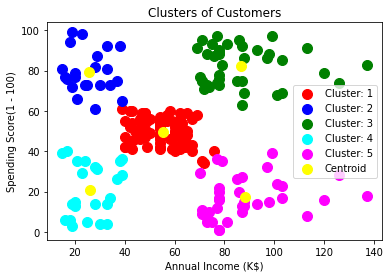

In [13]:
plt.scatter(x[dependent == 0, 0], x[dependent == 0, 1], s = 100, c = 'red', label = 'Cluster: 1')
plt.scatter(x[dependent == 1, 0], x[dependent == 1, 1], s = 100, c = 'blue', label = 'Cluster: 2')
plt.scatter(x[dependent == 2, 0], x[dependent == 2, 1], s = 100, c = 'green', label = 'Cluster: 3')
plt.scatter(x[dependent == 3, 0], x[dependent == 3, 1], s = 100, c = 'cyan', label = 'Cluster: 4')
plt.scatter(x[dependent == 4, 0], x[dependent == 4, 1], s = 100, c = 'magenta', label = 'Cluster: 5')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score(1 - 100)")
plt.legend()
plt.show()